In [2]:
import pandas as pd
df = pd.read_csv("/content/winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.isna().mean()*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

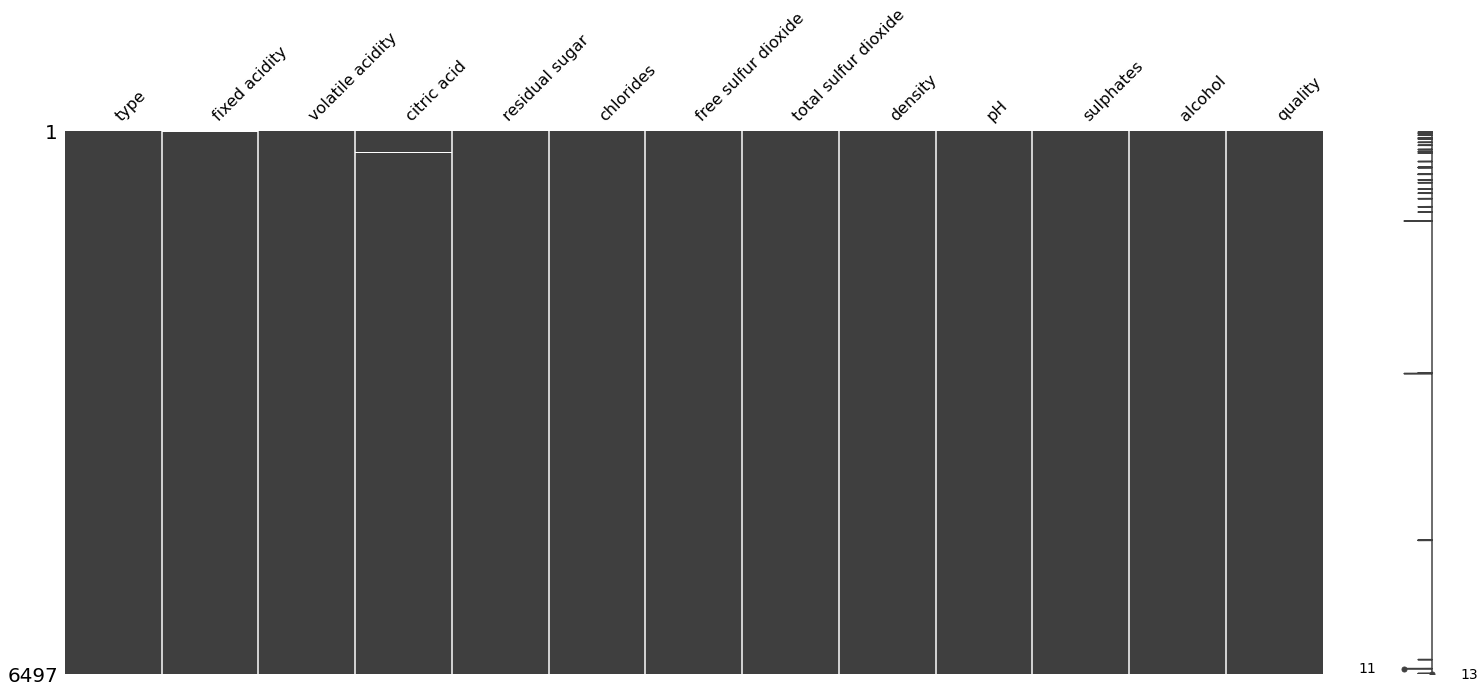

In [11]:
import missingno as msno
msno.matrix(df)


In [12]:
df_miss = df.dropna()

In [14]:
df_miss.isna().mean()*100
df_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [17]:
df = df_miss


In [18]:
df['approved'] = [1 if x >= 6 else 0 for x in df['quality']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, random_state=666)


In [26]:
train.shape

(5170, 14)

In [27]:
test.shape

(1293, 14)

In [28]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,approved
count,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000,5170.000000
mean,7.224555,0.339984,0.319207,5.483723,0.056283,30.566441,115.853868,0.994725,3.218234,0.530975,10.484113,5.825725,0.634236
std,1.312313,0.166464,0.147177,4.756918,0.035962,17.512574,56.324058,0.002996,0.161155,0.149374,1.185825,0.874609,0.481690
min,3.800000,0.080000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992383,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,29.000000,119.000000,0.994900,3.200000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,146.500000,366.500000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


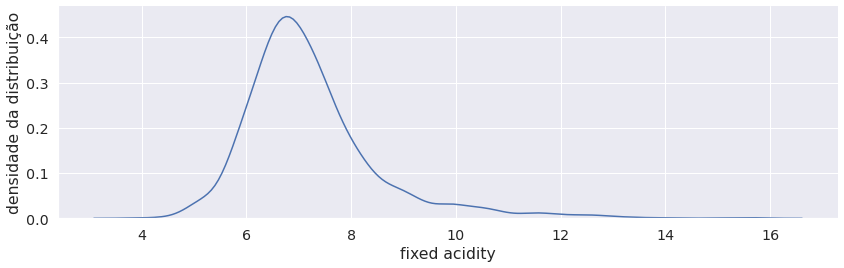

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.3)

sns.displot(train['fixed acidity'],
            height = 4,
            aspect = 3,
            kind = 'kde') #distribuição continua 
plt.ylabel('densidade da distribuição')
plt.show()

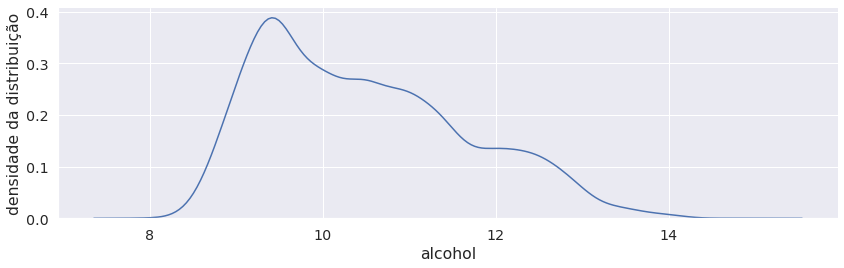

In [33]:
sns.displot(train['alcohol'],
            height = 4,
            aspect = 3,
            kind = 'kde')
plt.ylabel('densidade da distribuição')
plt.show()

In [38]:
#vamos ver nossa variavel discreta type que indica se o tipo do vinha e branco ou tinto
#usando normalize para retornar a proporção 
train['type'].value_counts(normalize = True)

white    0.753965
red      0.246035
Name: type, dtype: float64

In [40]:
#vendo a proporção na para os dados de teste 
test['type'].value_counts(normalize = True)

white    0.75174
red      0.24826
Name: type, dtype: float64

Text(0, 0.5, 'Contagem de vinhos')

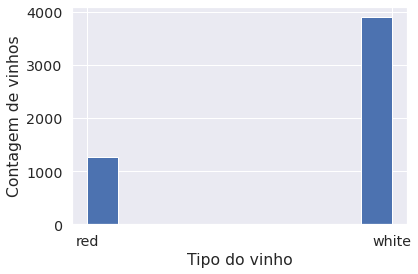

In [42]:
#visualizando em um histograma 
train['type'].hist()
plt.xlabel('Tipo do vinho')
plt.ylabel('Contagem de vinhos')

## vizualizando realações entre variaveis



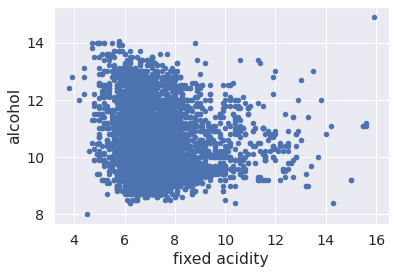

In [43]:
train.plot(x = 'fixed acidity', y ='alcohol', kind = 'scatter')
plt.show()

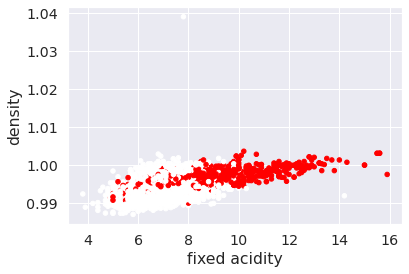

In [44]:
train.plot(x = 'fixed acidity', y ='density', 
           c ='type', #indicando que quero diferenciar a cor do grafico pelo type
           kind = 'scatter')
plt.show()

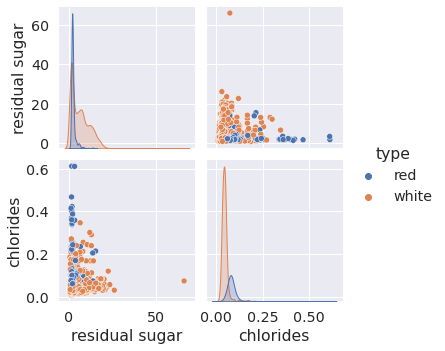

In [45]:
sns.set_context(font_scale=0.7)
sns.pairplot(train, # Dados para plotar
             hue='type', #Cada gráfico separado pelo tipo, nossa variável categórica
            vars=['residual sugar','chlorides'] # Variáveis a serem analisadas
            )
plt.show()

In [47]:
#deletando a coluna quality antes de visualizar a correlação pois não precisamos mais dela 
train.drop(['quality'], axis = 1, inplace = True)
# Correlações entre as features numéricas
train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,approved
fixed acidity,1.000000,0.225493,0.326322,-0.119505,0.295594,-0.286491,-0.337220,0.457458,-0.257770,0.303279,-0.091460,-0.066876
volatile acidity,0.225493,1.000000,-0.373217,-0.200089,0.366149,-0.359734,-0.417180,0.274246,0.254843,0.229235,-0.038686,-0.278056
citric acid,0.326322,-0.373217,1.000000,0.146097,0.050544,0.130784,0.187906,0.102924,-0.325086,0.061462,-0.010140,0.078948
residual sugar,-0.119505,-0.200089,0.146097,1.000000,-0.129767,0.408409,0.495279,0.549337,-0.265255,-0.182650,-0.359134,-0.018007
chlorides,0.295594,0.366149,0.050544,-0.129767,1.000000,-0.195243,-0.275470,0.356700,0.033114,0.404250,-0.254755,-0.184573
free sulfur dioxide,-0.286491,-0.359734,0.130784,0.408409,-0.195243,1.000000,0.721628,0.022882,-0.147854,-0.197204,-0.182785,0.044174
total sulfur dioxide,-0.337220,-0.417180,0.187906,0.495279,-0.275470,0.721628,1.000000,0.028063,-0.229639,-0.280087,-0.266821,-0.048555
density,0.457458,0.274246,0.102924,0.549337,0.356700,0.022882,0.028063,1.000000,0.007929,0.268849,-0.683995,-0.260023
pH,-0.257770,0.254843,-0.325086,-0.265255,0.033114,-0.147854,-0.229639,0.007929,1.000000,0.188599,0.120737,0.010543
sulphates,0.303279,0.229235,0.061462,-0.182650,0.404250,-0.197204,-0.280087,0.268849,0.188599,1.000000,-0.010878,0.033296


### visualizando melhor a relação com **heatmap** do seaborn

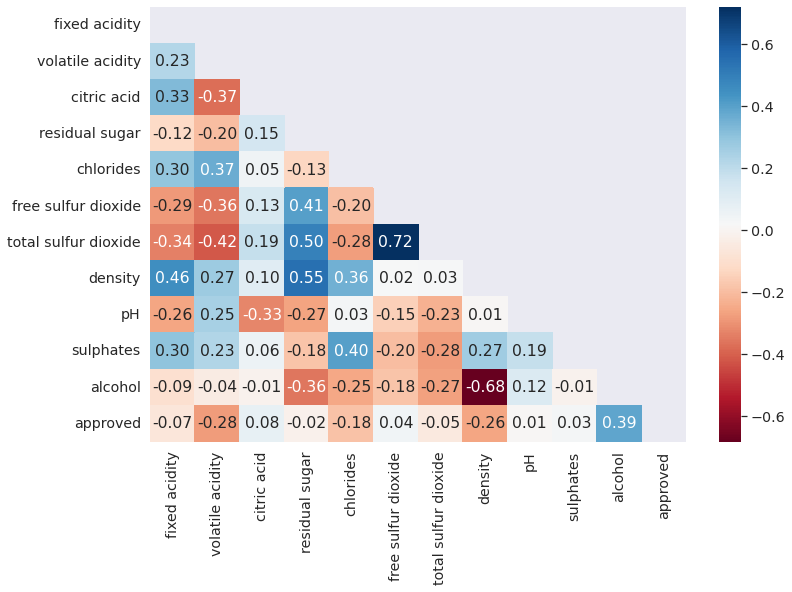

In [48]:
import numpy as np
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    train.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(train.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

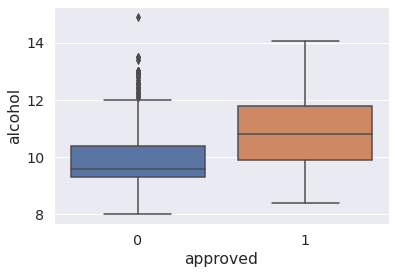

In [53]:
#visualizando melhor a correlação da variavel alcohol com aprovados
sns.boxplot(
    data=train, # Dataframe utilizado
    x='approved', # Variável no eixo x
    y='alcohol' # Variável no eixo y
)
plt.show()


In [54]:
# Listando as colunas numéricas
#fazendo uma matrix de 3 linhas e 4 colunas a ultima linha tem uma coluna vazia pois so possuimos 11 colunas 
colunas_numericas = [['fixed acidity','volatile acidity','citric acid','residual sugar'],
                    ['chlorides','free sulfur dioxide','total sulfur dioxide','density'],
                    ['pH','sulphates','alcohol','']] # Essa última célula está vazia pois temos 11 colunas numéricas


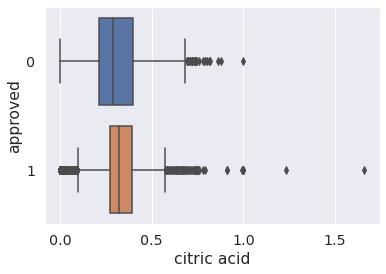

In [55]:
sns.boxplot(
    data=train, # Dataframe utilizado
    # Por exemplo, se quisermos plotar o 'citric acid', ele estará na primeira linha (0), terceira coluna (2)
    x=colunas_numericas[0][2], 
    y='approved', # Variável no eixo y, que será sempre o 'aprovado'
    orient='h' # h -> horizontal, v -> vertical
)
plt.show()

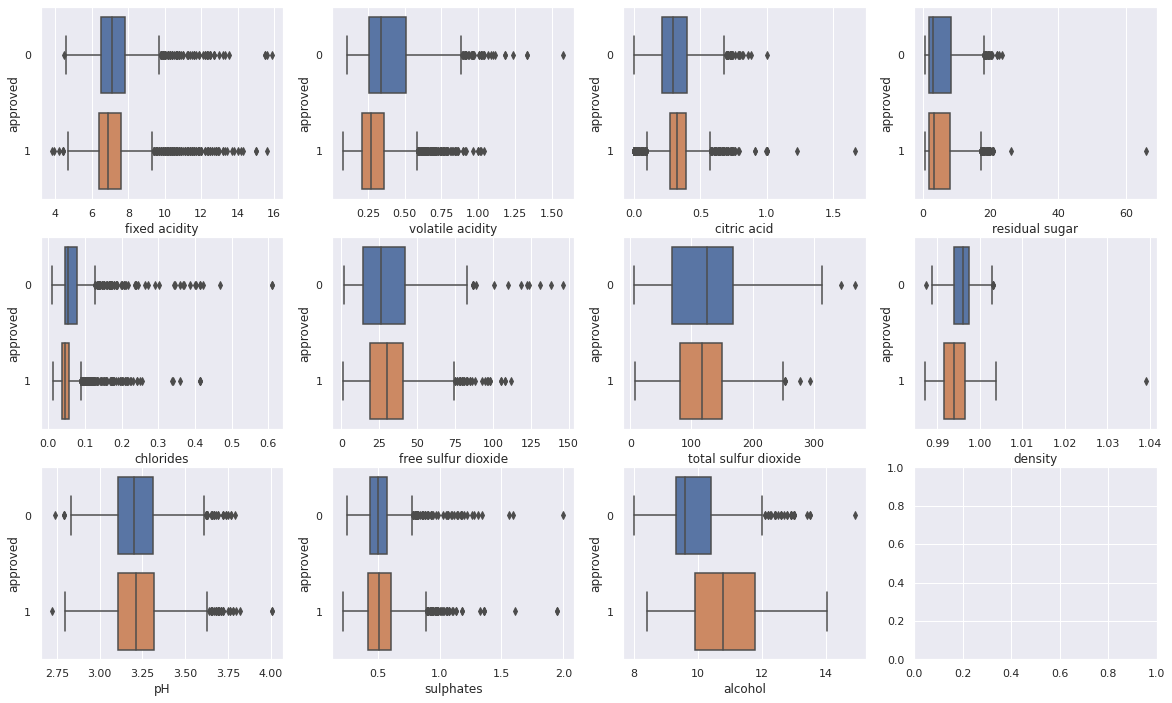

In [60]:
sns.set(font_scale=1)
#repetindo o processo acima para todas as colunas com um FOR
# Cria os 'espaços' para que possamos plotar os gráficos. Faremos um grid de 3 linhas por 4 colunas (o 3,4 na função)
fig, eixo = plt.subplots(3,4,figsize=(20,12)) # Criando uma figura e 12 eixos, em uma matriz de 3 linhas x 4 colunas
# Para cada linha 
for linha in range(3):
    # Para cada coluna
    for coluna in range(4): 
        # Verifica se existe um nome de coluna na lista 'colunas_numericas'
        if colunas_numericas[linha][coluna] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'aprovado'
            sns.boxplot(data=train,x=colunas_numericas[linha][coluna],y='approved',ax=eixo[linha][coluna],orient='h')

Olhando as relações vemos que o alcohol tem grande influencia no numero de vinhos aprovados 

In [59]:
#descobrindo a media de vinhas aprovados
# A média de uma coluna que possui '0's e '1's nos dará o percentual de '1's
train.approved.mean()

0.6342359767891683

## Vamos usar analises para encontrar os vinhos aprovados com base nas propriedades quimicas.

In [61]:
train.groupby('type')['approved'].mean() #media dos aprovados agrupado pelo tipo 

type
red      0.531447
white    0.667778
Name: approved, dtype: float64

### para usar o groupby em variaveis continuas precisamos transformalas em variaveis categoricas,

In [62]:
#para isso podemos usar uma função do pandas chamada cut

# Criando uma nova coluna que é a faixa da coluna 'chlorides'
train['chlorides'+'_faixa'] = pd.cut(
                              train['chlorides'], # Coluna de interesse
                              bins = 5) # Número de faixas

In [64]:
# Executando o .groupby() da coluna criada
#usamos .agg quando queremos mais de uma metrica
agrupamento = train.groupby('chlorides_faixa')['approved'].agg(['count','mean']) # agg de aggregation. 
agrupamento

,count,mean
chlorides_faixa,,
"(0.0084, 0.129]",5038,0.639341
"(0.129, 0.25]",106,0.471698
"(0.25, 0.37]",14,0.357143
"(0.37, 0.491]",10,0.300000
"(0.491, 0.611]",2,0.000000


In [69]:
train['alcohol'+'_faixa'] = pd.cut(train['alcohol'], bins = 5)
agrupamento = train.groupby('alcohol_faixa')['approved'].agg(['count','mean'])
#Renomeando colunas
agrupamento.columns = ['contagem','fração vinhos aprovados']
agrupamento

,contagem,fração vinhos aprovados
alcohol_faixa,,
"(7.993, 9.38]",944,0.441737
"(9.38, 10.76]",2246,0.527159
"(10.76, 12.14]",1366,0.800878
"(12.14, 13.52]",580,0.950000
"(13.52, 14.9]",34,0.970588
